In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import rcParams

# MEPS Data Analysis

In this notebook, we will begin to answer the preliminary data analysis questions with statistical and graphical tools. This data analysis is performed on the 2015 MEPS dataset, which has been validated in the "MEPSDataValidation" notebook.

In [3]:
df = pickle.load(open('categorical_meps_2015.pkl', 'rb'))

In [4]:
df.columns

Index([u'ER_exp', u'age', u'dx_COPD', u'dx_IHD', u'dx_arth', u'dx_asth',
       u'dx_canc', u'dx_diab', u'dx_hyplp', u'dx_hyptn', u'dx_strk',
       u'fam_inc_tot', u'inc_categ', u'inc_contin', u'inp_exp', u'insur_mcd',
       u'insur_mcr', u'insur_priv', u'mh31', u'mh31_42_chnge', u'mh42',
       u'mh42_53_chnge', u'mh53', u'mh_tot_chnge', u'outp_exp', u'race',
       u'region', u'rh31', u'rh31_42_chnge', u'rh42', u'rh42_53_chnge',
       u'rh53', u'rh_tot_chnge', u'sex', u'tot_exp', u'tot_mcd_exp',
       u'tot_mcr_exp', u'tot_prv_exp', u'tot_slf_exp', u'user_id',
       u'tot_exp_cats', u'tot_slf_cats', u'tot_mcr_cats', u'tot_mcd_cats',
       u'tot_prv_cats', u'age_cat', u'exp_deciles'],
      dtype='object')

In [5]:
# Re-define relevant variables from DataValidation
exp_vars = ['tot_exp', 'tot_slf_exp', 'tot_mcr_exp', 'tot_mcd_exp', 'tot_prv_exp']
chron_dx_categs = ['dx_arth', 'dx_asth', 'dx_canc', 'dx_COPD', 'dx_diab', 'dx_hyplp', 'dx_hyptn', 'dx_IHD', 'dx_strk']

## Data Visualizations of Preliminary Statistics

(Text(0.5,1,u'Expenditure Distribution by Category (Full Population)'),
 Text(0.5,0,u'Expenditures ($)'))

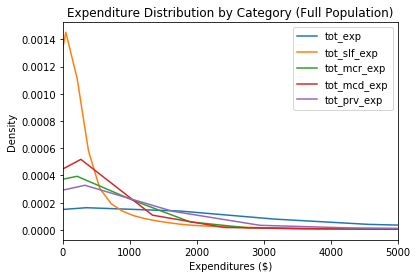

In [6]:
# Plot overall population level expenditures distribution
df[exp_vars].plot(kind='kde')

ax = plt.gca()
ax.set_xlim(0,5000)
ax.set_title('Expenditure Distribution by Category (Full Population)'), ax.set_xlabel('Expenditures ($)')

In [7]:
df.groupby('sex')[exp_vars].mean()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
sex,,,,,
male,3631.805854,384.491624,1012.786457,547.226298,1204.540998
female,4669.425600,510.171880,1353.085261,867.753503,1561.065982


In [8]:
df.groupby('sex')[exp_vars].mean().loc['male']

tot_exp        3631.805854
tot_slf_exp     384.491624
tot_mcr_exp    1012.786457
tot_mcd_exp     547.226298
tot_prv_exp    1204.540998
Name: male, dtype: float64

In [10]:
exp_by_age = df.groupby('age_cat')[exp_vars].mean()
exp_by_age

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
age_cat,,,,,
0-4,1452.903046,61.510152,1.170558,799.691878,440.015736
5-17,1379.008696,200.612974,3.110973,643.767012,467.791718
18-24,1656.539379,197.270585,14.228520,538.128282,756.565931
25-44,2971.151306,355.235082,207.945424,658.119346,1420.984179
45-64,6163.025620,663.142022,1169.996256,869.536032,2685.586804
65-85,10687.618612,1034.718813,6720.107342,743.157777,1273.923455


In [11]:
# Mean expenditures by region
exp_by_region = df.groupby('region')[exp_vars].mean()
exp_by_region

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
region,,,,,
Northeast,5781.573496,443.065689,1768.857959,1389.403275,1804.564547
Midwest,4754.822847,548.310476,1238.191051,749.066432,1845.506261
South,3697.453839,417.178796,1127.672984,519.435256,1140.939661
West,3360.985432,429.122205,799.960445,594.246029,1163.761254


In [14]:
exp_by_region.head()

,tot_exp,tot_slf_exp,tot_mcr_exp,tot_mcd_exp,tot_prv_exp
region,,,,,
Northeast,5781.573496,443.065689,1768.857959,1389.403275,1804.564547
Midwest,4754.822847,548.310476,1238.191051,749.066432,1845.506261
South,3697.453839,417.178796,1127.672984,519.435256,1140.939661
West,3360.985432,429.122205,799.960445,594.246029,1163.761254


rh31
Excellent    AxesSubplot(0.125,0.125;0.775x0.755)
Very Good    AxesSubplot(0.125,0.125;0.775x0.755)
Good         AxesSubplot(0.125,0.125;0.775x0.755)
Fair         AxesSubplot(0.125,0.125;0.775x0.755)
Poor         AxesSubplot(0.125,0.125;0.775x0.755)
Name: tot_exp, dtype: object

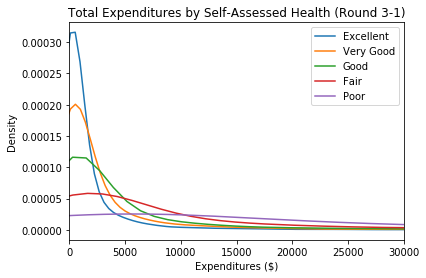

In [16]:
ax = plt.gca()
ax.set_xlim(0,30000)
ax.set_title ('Total Expenditures by Self-Assessed Health (Round 3-1)')
ax.set_xlabel('Expenditures ($)')
df.groupby('rh31')['tot_exp'].plot(kind='kde', legend=True)

mh53
Excellent    AxesSubplot(0.125,0.125;0.775x0.755)
Very Good    AxesSubplot(0.125,0.125;0.775x0.755)
Good         AxesSubplot(0.125,0.125;0.775x0.755)
Fair         AxesSubplot(0.125,0.125;0.775x0.755)
Poor         AxesSubplot(0.125,0.125;0.775x0.755)
Name: tot_exp, dtype: object

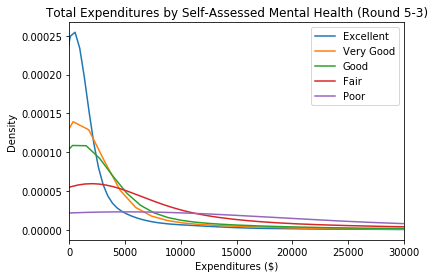

In [17]:
ax = plt.gca()
ax.set_xlim(0,30000)
ax.set_title ('Total Expenditures by Self-Assessed Mental Health (Round 5-3)')
ax.set_xlabel('Expenditures ($)')
df.groupby('mh53')['tot_exp'].plot(kind='kde', legend=True)

In [18]:
# Helper function to filter for chronic conditions
def has_diag(row):
    return (row=='Yes').any()

In [19]:
# Avg spending breakdown by chronic condition
d_chron_masks = {}
d_chron_dfs = {}
for condition in chron_dx_categs:
    d_chron_masks["{0}_mask".format(condition)]  = df[[condition]].apply(has_diag, axis=1)
    d_chron_dfs["{0}_df".format(condition)] = df[(d_chron_masks["{0}_mask".format(condition)])]

In [20]:
# Generate expenditures by diagnosis in exp_by_diag dictionary
exp_by_diag = {}
for exp_categ in exp_vars:
    exp_by_diag['{0}'.format(exp_categ)] = []
    for condition in chron_dx_categs:
        exp_by_diag['{0}'.format(exp_categ)].append(d_chron_dfs['{0}_df'.format(condition)]['{0}'.format(exp_categ)].mean())

### Self-Reported Health by Diagnosis

In [22]:
# Collect data about self-reported health by diagnosis
health_by_diag = {}

for report_round in ['rh31','mh31']:
    for condition in chron_dx_categs:
        health_by_diag[report_round + '_{0}'.format(condition)] = d_chron_dfs.get("{0}_df".format(condition))['{0}'.format(report_round)].value_counts()

In [23]:
health_by_diag.get('rh31_dx_canc').sort_index()

Excellent    339
Very Good    610
Good         643
Fair         400
Poor         217
Name: rh31, dtype: int64

In [24]:
health_by_diag_data = {}
health_cats = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']


for report_round in ['rh31','mh31']:
    for condition in chron_dx_categs:
        curr_list = []
        for health_cat in health_cats:
            curr_list.append(health_by_diag.get(report_round + "_{0}".format(condition)).loc['{0}'.format(health_cat)])
        health_by_diag_data['{0}_{1}'.format(report_round, condition)] = curr_list

In [25]:
health_by_diag_data

{'mh31_dx_COPD': [70, 97, 166, 96, 32],
 'mh31_dx_IHD': [265, 307, 450, 196, 56],
 'mh31_dx_arth': [1585, 1628, 2047, 783, 225],
 'mh31_dx_asth': [1226, 799, 934, 336, 98],
 'mh31_dx_canc': [677, 626, 610, 222, 77],
 'mh31_dx_diab': [670, 621, 987, 368, 103],
 'mh31_dx_hyplp': [2124, 2015, 2243, 794, 201],
 'mh31_dx_hyptn': [2396, 2215, 2593, 900, 241],
 'mh31_dx_strk': [190, 214, 345, 210, 68],
 'rh31_dx_COPD': [22, 67, 98, 158, 116],
 'rh31_dx_IHD': [74, 195, 428, 369, 209],
 'rh31_dx_arth': [692, 1489, 2014, 1468, 604],
 'rh31_dx_asth': [754, 881, 986, 545, 230],
 'rh31_dx_canc': [339, 610, 643, 400, 217],
 'rh31_dx_diab': [156, 479, 950, 840, 322],
 'rh31_dx_hyplp': [951, 1974, 2386, 1517, 548],
 'rh31_dx_hyptn': [912, 2111, 2846, 1813, 660],
 'rh31_dx_strk': [62, 169, 297, 323, 178]}

In [26]:
# Collect data about self-reported health by diagnosis (normalized)
health_by_diag_norm = {}

for report_round in ['rh31','mh31']:
    for condition in chron_dx_categs:
        health_by_diag_norm[report_round + '_{0}'.format(condition)] = d_chron_dfs.get("{0}_df".format(condition))['{0}'.format(report_round)].value_counts(normalize=True)

In [27]:
health_by_diag_data_norm = {}
health_cats = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']


for report_round in ['rh31','mh31']:
    for condition in chron_dx_categs:
        curr_list = []
        for health_cat in health_cats:
            curr_list.append(health_by_diag_norm.get(report_round + "_{0}".format(condition)).loc['{0}'.format(health_cat)])
        health_by_diag_data_norm['{0}_{1}'.format(report_round, condition)] = curr_list

## Diving into Self-Reported-Health Categories

Understand the distribution of self-reported health answers

### Scatter Plots

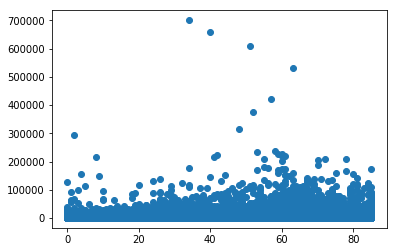

In [29]:
plt.scatter(df.age, df.tot_exp)

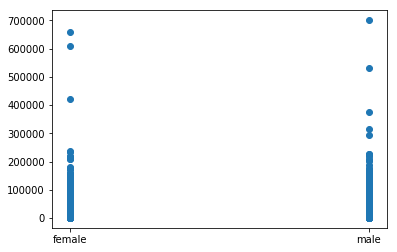

In [30]:
plt.scatter(df.sex, df.tot_exp)

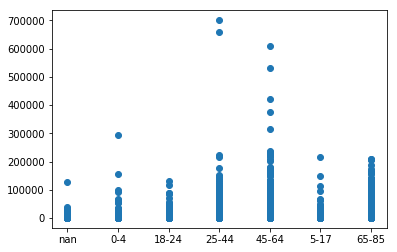

In [31]:
plt.scatter(df.age_cat, df.tot_exp)

## Most Current Figures

(Text(0.5,1,u'Total Expenditures Distribution'),
 Text(0.5,0,u'Expenditures ($)'))

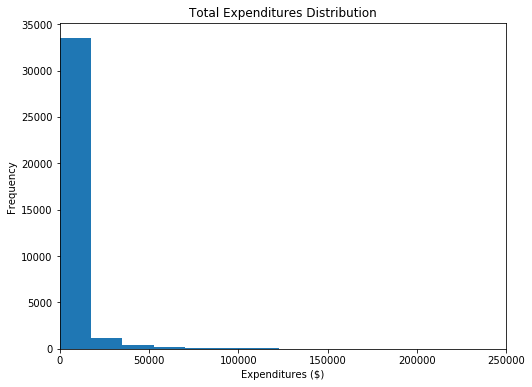

In [32]:
fig=plt.figure(figsize=(8,6))

df.tot_exp.plot.hist(bins=40)

ax = plt.gca()
ax.set_xlim(0, 250000)
ax.set_title('Total Expenditures Distribution'), ax.set_xlabel('Expenditures ($)')

Text(0.5,0,u'Log of Expenditures')

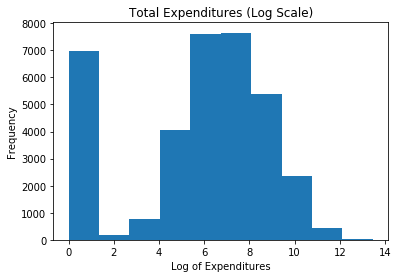

In [33]:
df.tot_exp.apply(lambda x: np.log(max(x, 1))).plot.hist()

ax = plt.gca()

#ax.set_xlim(0, df.tot_exp.max())
# setting titles
ax.set_title('Total Expenditures (Log Scale)')
ax.set_xlabel('Log of Expenditures')
#ax.set_yscale('log')

Text(0.5,0,u'Log of Expenditures')

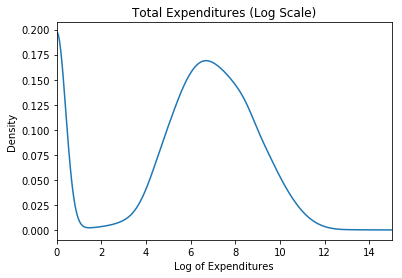

In [34]:
df.tot_exp.apply(lambda x: np.log(max(x, 1))).plot.kde()

ax = plt.gca()

ax.set_xlim(0, 15)
# setting titles
ax.set_title('Total Expenditures (Log Scale)')
ax.set_xlabel('Log of Expenditures')
#ax.set_yscale('log')

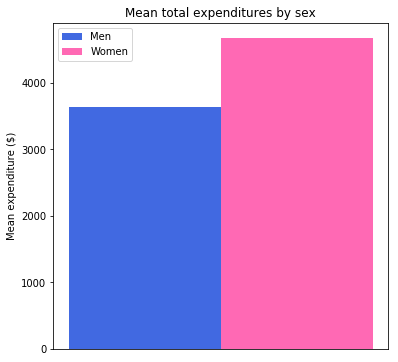

In [35]:
# Mean Total Expenditures by Sex
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
ind = 1
width = 0.35 

rects1 = ax.bar(ind, df.groupby('sex')['tot_exp'].mean().loc['male'], width, color='royalblue')
rects2 = ax.bar(ind+width, df.groupby('sex')['tot_exp'].mean().loc['female'], width, color='hotpink')

ax.legend((rects1[0], rects2[0]), ('Men', 'Women') )
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.set_ylabel('Mean expenditure ($)')
ax.set_title('Mean total expenditures by sex')

plt.show()

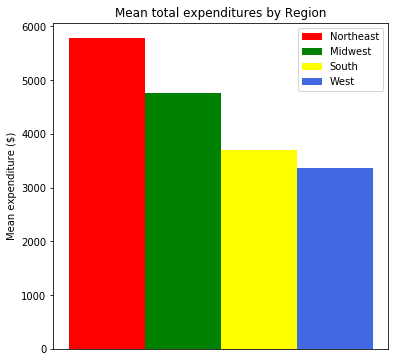

In [36]:
# Mean Expenditures by Region
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

rects1 = ax.bar(ind, exp_by_region.tot_exp.iloc[0], width, color='red')
rects2 = ax.bar(ind+width, exp_by_region.tot_exp.iloc[1], width, color='green')
rects3 = ax.bar(ind+width*2, exp_by_region.tot_exp.iloc[2], width, color='yellow')
rects4 = ax.bar(ind+width*3, exp_by_region.tot_exp.iloc[3], width, color='royalblue')

ax.set_ylabel('Mean expenditure ($)')
ax.set_title('Mean total expenditures by Region')
ax.tick_params(axis='x', bottom=False, labelbottom=False)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Northeast','Midwest','South','West') )

plt.show()

Text(0.5,0,u'Total Expenditures ($)')

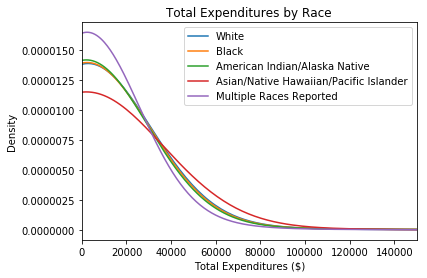

In [37]:
df.groupby('race').tot_exp.plot(kind='kde', bw_method=2, legend=True)

ax = plt.gca()

ax.set_xlim(0,150000)
# setting titles
ax.set_title('Total Expenditures by Race')
ax.set_xlabel('Total Expenditures ($)')

<Container object of 5 artists>

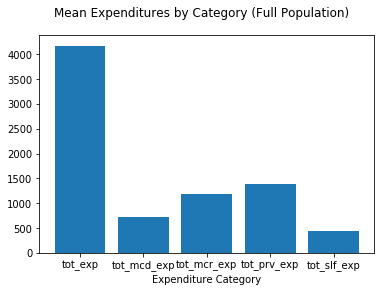

In [38]:
# Plot overall mean population level expenditures categories
plt.suptitle('Mean Expenditures by Category (Full Population)', fontsize=12), plt.xlabel('Expenditure Category')
plt.bar(exp_vars, df[exp_vars].mean())

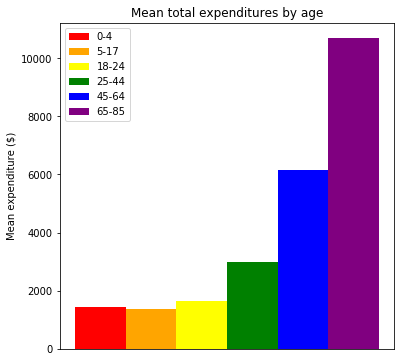

In [39]:
# Mean expenditures by age category
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

rects1 = ax.bar(ind, exp_by_age.tot_exp.iloc[0], width, color='red')
rects2 = ax.bar(ind+width, exp_by_age.tot_exp.iloc[1], width, color='orange')
rects3 = ax.bar(ind+width*2, exp_by_age.tot_exp.iloc[2], width, color='yellow')
rects4 = ax.bar(ind+width*3, exp_by_age.tot_exp.iloc[3], width, color='green')
rects5 = ax.bar(ind+width*4, exp_by_age.tot_exp.iloc[4], width, color='blue')
rects6 = ax.bar(ind+width*5, exp_by_age.tot_exp.iloc[5], width, color='purple')

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]), ('0-4', '5-17', '18-24', '25-44', '45-64', '65-85') )

ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.set_ylabel('Mean expenditure ($)')
ax.set_title('Mean total expenditures by age')

plt.show()

<Container object of 9 artists>

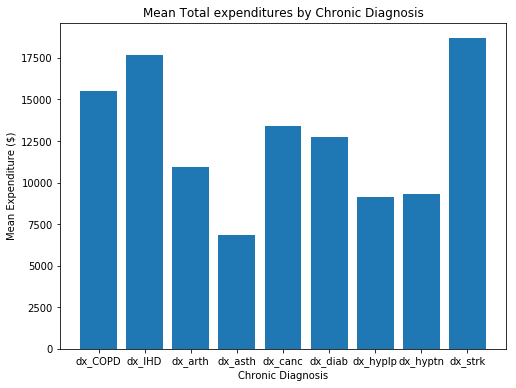

In [40]:
plt.figure(figsize=(8,6))
plt.title('Mean Total expenditures by Chronic Diagnosis') 
plt.xlabel('Chronic Diagnosis'), plt.ylabel('Mean Expenditure ($)')
plt.bar(chron_dx_categs, exp_by_diag.get("tot_exp"))

In [41]:
pd.DataFrame(health_by_diag_data).transpose().iloc[9:]

,0,1,2,3,4
rh31_dx_COPD,22,67,98,158,116
rh31_dx_IHD,74,195,428,369,209
rh31_dx_arth,692,1489,2014,1468,604
rh31_dx_asth,754,881,986,545,230
rh31_dx_canc,339,610,643,400,217
rh31_dx_diab,156,479,950,840,322
rh31_dx_hyplp,951,1974,2386,1517,548
rh31_dx_hyptn,912,2111,2846,1813,660
rh31_dx_strk,62,169,297,323,178


/anaconda2/lib/python2.7/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,0,u'Diagnosis Category')

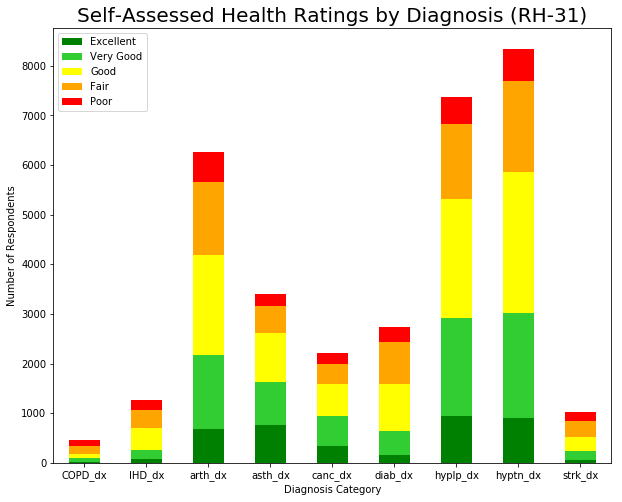

In [43]:
colors=['green', 'limegreen', 'yellow', 'orange', 'red']
pd.DataFrame(health_by_diag_data).transpose().iloc[9:].rename({0: 'Excellent', 1: 'Very Good', 2: 'Good', 3: 'Fair', 4: 'Poor'}, axis=1).plot.bar(stacked=True, colors=colors, figsize=(10,8), rot=0)

ax=plt.gca()
ax.set_xticklabels(['COPD_dx', 'IHD_dx', 'arth_dx', 'asth_dx', 'canc_dx', 'diab_dx', 'hyplp_dx', 'hyptn_dx', 'strk_dx'])
ax.set_title('Self-Assessed Health Ratings by Diagnosis (RH-31)', fontsize=20), ax.set_ylabel('Number of Respondents', fontsize=10)
ax.set_xlabel('Diagnosis Category')


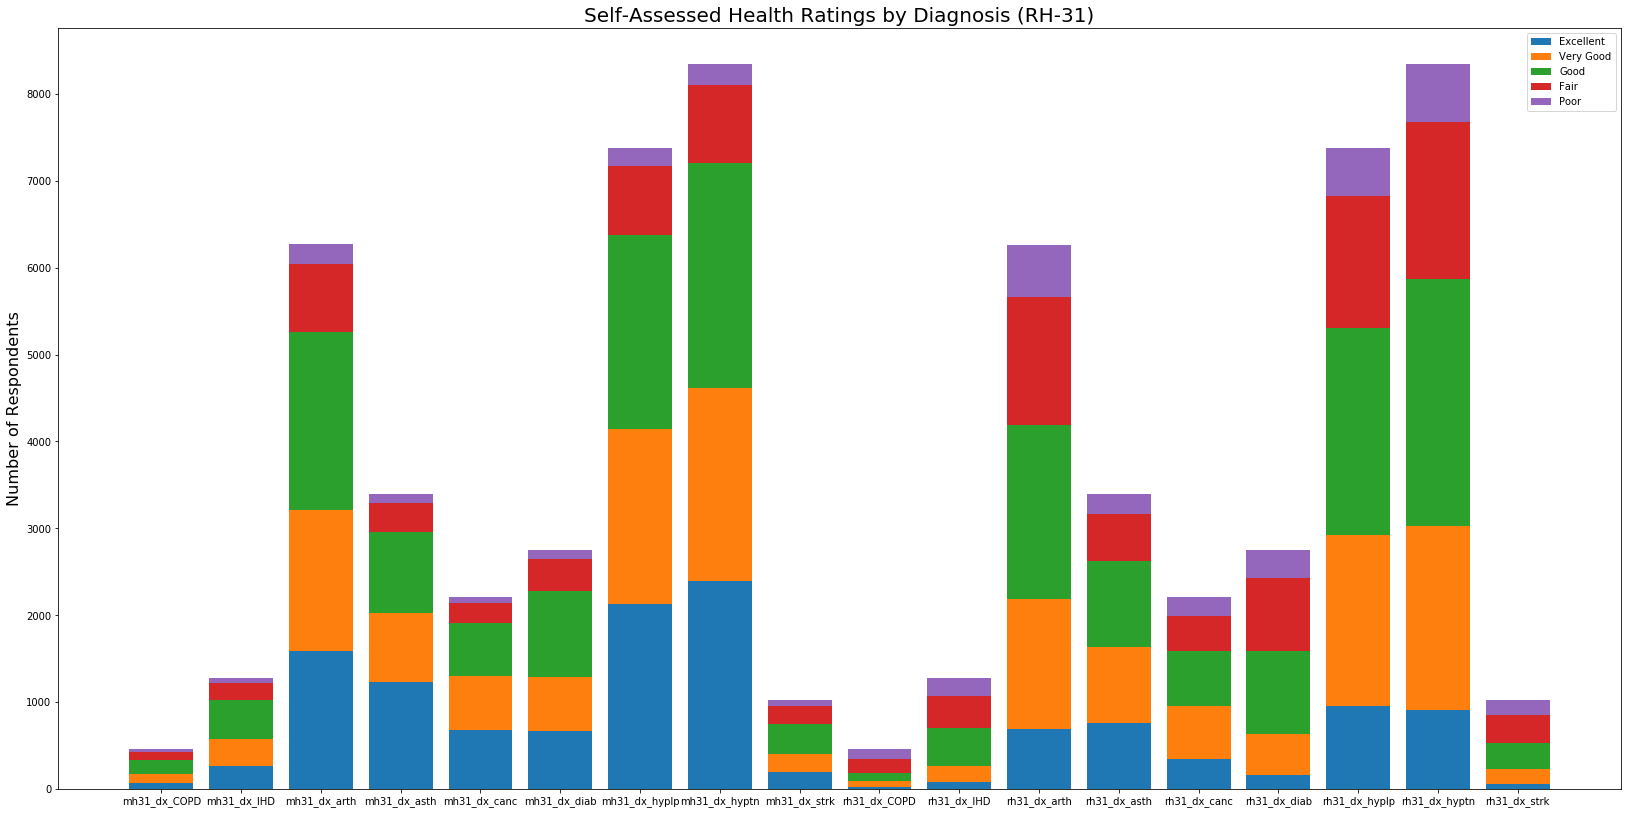

In [44]:
c = []
v = []

for key, val in health_by_diag_data.items():
    c.append(key)
    v.append(val)
v = np.array(v)

plt.figure(figsize=(28,14))
plt.bar(c, v[:,0], label='Excellent')
plt.bar(c, v[:,1], bottom=v[:,0], label='Very Good')
plt.bar(c, v[:,2], bottom=v[:,0]+v[:,1], label='Good')
plt.bar(c, v[:,3], bottom=v[:,0]+v[:,1]+v[:,2], label='Fair')
plt.bar(c, v[:,4], bottom=v[:,0]+v[:,1]+v[:,2]+v[:,3], label='Poor')

ax = plt.gca()
ax.legend()
ax.set_title('Self-Assessed Health Ratings by Diagnosis (RH-31)', fontsize=20), ax.set_ylabel('Number of Respondents', fontsize=16)

plt.show()


[[0.22202591 0.25942285 0.29034158 0.16048292 0.06772674]
 [0.30605787 0.28300181 0.27576854 0.10036166 0.03481013]
 [0.15346311 0.27614305 0.29108194 0.18107741 0.0982345 ]
 [0.04772234 0.14533623 0.21258134 0.34273319 0.2516269 ]
 [0.11041966 0.23759375 0.32136588 0.23424286 0.09637785]
 [0.12893167 0.26762473 0.32348156 0.20566703 0.07429501]
 [0.1093263  0.25305682 0.34116519 0.21733397 0.07911772]
 [0.05803922 0.15294118 0.33568627 0.28941176 0.16392157]
 [0.06025267 0.16423712 0.28862974 0.31389699 0.17298348]
 [0.24372499 0.22590033 0.35903965 0.13386686 0.03746817]
 [0.25287173 0.25973197 0.32657945 0.12492023 0.03589662]
 [0.18500487 0.2083739  0.33592989 0.20447907 0.06621227]
 [0.15184382 0.21041215 0.36008677 0.20824295 0.06941432]
 [0.28792192 0.27314627 0.30405314 0.10763183 0.02724685]
 [0.20800628 0.24097331 0.35321821 0.15384615 0.04395604]
 [0.05678922 0.17437204 0.34583182 0.30578813 0.11721878]
 [0.36133215 0.23548482 0.27527262 0.09902741 0.02888299]
 [0.28711803 0

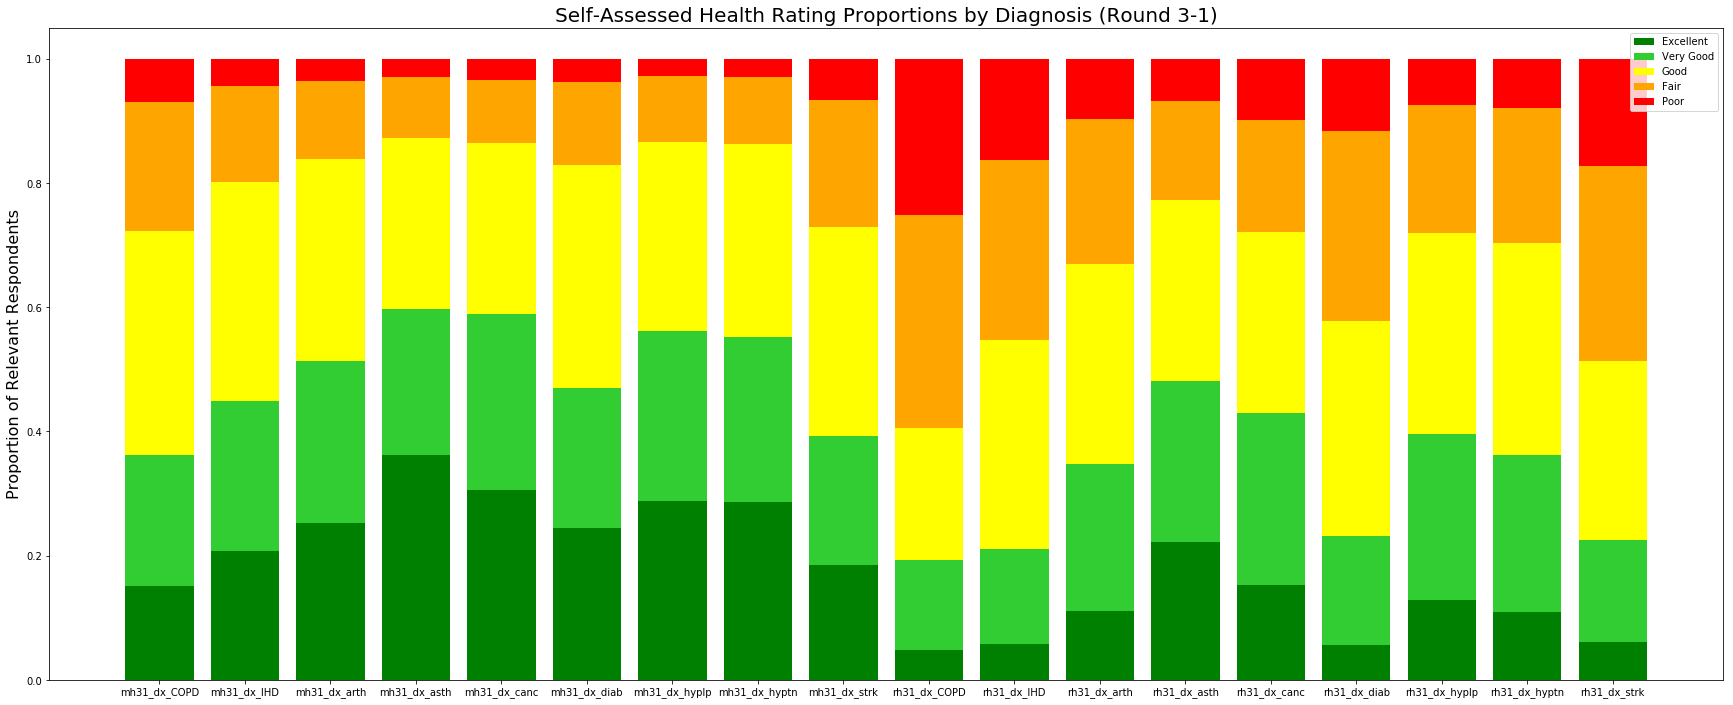

In [45]:
c = []
v = []

for key, val in health_by_diag_data_norm.items():
    c.append(key)
    v.append(val)
v = np.array(v)
print v

plt.figure(figsize=(30,12))
plt.bar(c, v[:,0], label='Excellent', color='Green')
plt.bar(c, v[:,1], bottom=v[:,0], label='Very Good', color='limegreen')
plt.bar(c, v[:,2], bottom=v[:,0]+v[:,1], label='Good', color='yellow')
plt.bar(c, v[:,3], bottom=v[:,0]+v[:,1]+v[:,2], label='Fair', color='orange')
plt.bar(c, v[:,4], bottom=v[:,0]+v[:,1]+v[:,2]+v[:,3], label='Poor', color='red')

ax = plt.gca()
ax.legend()
ax.set_title('Self-Assessed Health Rating Proportions by Diagnosis (Round 3-1)', fontsize=20), ax.set_ylabel('Proportion of Relevant Respondents', fontsize=16)

plt.show()

In [46]:
# Turn Data into DataFrame
health_by_diag_norm_df = pd.DataFrame(health_by_diag_data_norm)
health_by_diag_norm_df = health_by_diag_norm_df.rename({0: 'Excellent', 1: 'Very Good', 2: 'Good', 3: 'Fair', 4: 'Poor'}, axis='index')
health_by_diag_norm_df

,mh31_dx_COPD,mh31_dx_IHD,mh31_dx_arth,mh31_dx_asth,mh31_dx_canc,mh31_dx_diab,mh31_dx_hyplp,mh31_dx_hyptn,mh31_dx_strk,rh31_dx_COPD,rh31_dx_IHD,rh31_dx_arth,rh31_dx_asth,rh31_dx_canc,rh31_dx_diab,rh31_dx_hyplp,rh31_dx_hyptn,rh31_dx_strk
Excellent,0.151844,0.208006,0.252872,0.361332,0.306058,0.243725,0.287922,0.287118,0.185005,0.047722,0.058039,0.110420,0.222026,0.153463,0.056789,0.128932,0.109326,0.060253
Very Good,0.210412,0.240973,0.259732,0.235485,0.283002,0.225900,0.273146,0.265428,0.208374,0.145336,0.152941,0.237594,0.259423,0.276143,0.174372,0.267625,0.253057,0.164237
Good,0.360087,0.353218,0.326579,0.275273,0.275769,0.359040,0.304053,0.310725,0.335930,0.212581,0.335686,0.321366,0.290342,0.291082,0.345832,0.323482,0.341165,0.288630
Fair,0.208243,0.153846,0.124920,0.099027,0.100362,0.133867,0.107632,0.107849,0.204479,0.342733,0.289412,0.234243,0.160483,0.181077,0.305788,0.205667,0.217334,0.313897
Poor,0.069414,0.043956,0.035897,0.028883,0.034810,0.037468,0.027247,0.028880,0.066212,0.251627,0.163922,0.096378,0.067727,0.098234,0.117219,0.074295,0.079118,0.172983


In [47]:
# Helper fxns for chron dx analysis
def has_diag(row):
    return (row=='Yes').any()

def has_no_diags(row):
    return (row=='No').all()

In [48]:
# DF for those who have any chronic diagnosis
chron_dx_pos_mask = df[chron_dx_categs].apply(has_diag, axis=1)
chron_dx_pos_df = df[chron_dx_pos_mask]
chron_dx_pos_df.head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats,age_cat,exp_deciles
0,772,53,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,0,375,60001101,$4033-$700771,$228-$692,$7803-$421571,$1560-$534580,$0,45-64,"(9768.0, 700771.0]"
1,362,56,No,No,Yes,Yes,No,Yes,Yes,Yes,...,0,11,60001102,$4033-$700771,$1-$63,$2168-$7802,$1560-$534580,$0,45-64,"(4068.0, 9768.0]"
9,0,45,No,No,No,No,No,No,No,Yes,...,119,57,60003101,$1-$331,$1-$63,$0,$0,$1-$269,45-64,"(159.0, 338.0]"
13,0,27,No,No,No,No,No,No,Yes,No,...,0,0,60004101,$0,$0,$0,$0,$0,25-44,"(-0.001, 12.0]"
15,0,61,No,No,No,No,No,Yes,Yes,Yes,...,0,602,60004103,$1099-$4032,$228-$692,$0,$0,$0,45-64,"(2045.0, 4068.0]"


In [49]:
# DF for those who have no chronic diagnoses
chron_dx_neg_mask = df[chron_dx_categs].apply(has_no_diags, axis=1)
chron_dx_neg_df = df[chron_dx_neg_mask]
chron_dx_neg_df.head()

,ER_exp,age,dx_COPD,dx_IHD,dx_arth,dx_asth,dx_canc,dx_diab,dx_hyplp,dx_hyptn,...,tot_prv_exp,tot_slf_exp,user_id,tot_exp_cats,tot_slf_cats,tot_mcr_cats,tot_mcd_cats,tot_prv_cats,age_cat,exp_deciles
2,0,30,No,No,No,No,No,No,No,No,...,0,0,60001103,$0,$0,$0,$0,$0,25-44,"(-0.001, 12.0]"
3,381,23,No,No,No,No,No,No,No,No,...,0,22,60001104,$332-$1098,$1-$63,$0,$433-$1559,$0,18-24,"(620.0, 1111.0]"
5,0,27,No,No,No,No,No,No,No,No,...,0,0,60002101,$0,$0,$0,$0,$0,25-44,"(-0.001, 12.0]"
6,0,25,No,No,No,No,No,No,No,No,...,0,0,60002102,$1099-$4032,$0,$0,$0,$0,25-44,"(1111.0, 2045.0]"
10,0,49,No,No,No,No,No,No,No,No,...,342,90,60003102,$332-$1098,$63-$227,$0,$0,$270-$767,45-64,"(338.0, 620.0]"


In [62]:
# Split Data by RH, add overall percentages (for people with any diagnosis)
health_by_diag_norm_rh_df = health_by_diag_norm_df.iloc[:,9:].copy()
health_by_diag_norm_rh_df['rh31_any_dx'] = chron_dx_pos_df.rh31.value_counts(normalize=True)
health_by_diag_norm_rh_df['rh31_overall'] = df.rh31.value_counts(normalize=True)
health_by_diag_norm_rh_df['rh31_no_dx'] = chron_dx_neg_df.rh31.value_counts(normalize=True)
health_by_diag_norm_rh_df = health_by_diag_norm_rh_df.drop(columns=['rh31_any_dx', 'rh31_no_dx'])

In [51]:
# Split Data by MH, add overall percentages
health_by_diag_norm_mh_df = health_by_diag_norm_df.iloc[:,0:9].copy()
health_by_diag_norm_mh_df['mh31_any_dx'] = chron_dx_pos_df.mh31.value_counts(normalize=True)
health_by_diag_norm_mh_df['mh31_overall'] = df.mh31.value_counts(normalize=True)
health_by_diag_norm_mh_df['mh31_no_dx'] = chron_dx_neg_df.mh31.value_counts(normalize=True)
health_by_diag_norm_mh_df

,mh31_dx_COPD,mh31_dx_IHD,mh31_dx_arth,mh31_dx_asth,mh31_dx_canc,mh31_dx_diab,mh31_dx_hyplp,mh31_dx_hyptn,mh31_dx_strk,mh31_any_dx,mh31_overall,mh31_no_dx
Excellent,0.151844,0.208006,0.252872,0.361332,0.306058,0.243725,0.287922,0.287118,0.185005,0.327584,0.450669,0.489392
Very Good,0.210412,0.240973,0.259732,0.235485,0.283002,0.225900,0.273146,0.265428,0.208374,0.269046,0.254251,0.271528
Good,0.360087,0.353218,0.326579,0.275273,0.275769,0.359040,0.304053,0.310725,0.335930,0.287560,0.226107,0.199412
Fair,0.208243,0.153846,0.124920,0.099027,0.100362,0.133867,0.107632,0.107849,0.204479,0.091835,0.055032,0.032359
Poor,0.069414,0.043956,0.035897,0.028883,0.034810,0.037468,0.027247,0.028880,0.066212,0.023974,0.013940,0.007310


(Text(0.5,0,u'Diagnosis Category'),
 [Text(0,0,u'COPD'),
  Text(0,0,u'IHD'),
  Text(0,0,u'Arthritis'),
  Text(0,0,u'Asthma'),
  Text(0,0,u'Cancer'),
  Text(0,0,u'Diabetes'),
  Text(0,0,u'High Cholest.'),
  Text(0,0,u'High Bp.'),
  Text(0,0,u'Stroke'),
  Text(0,0,u'Total Pop.'),
  Text(0,0,u'At least 1 dx'),
  Text(0,0,u'No dx')])

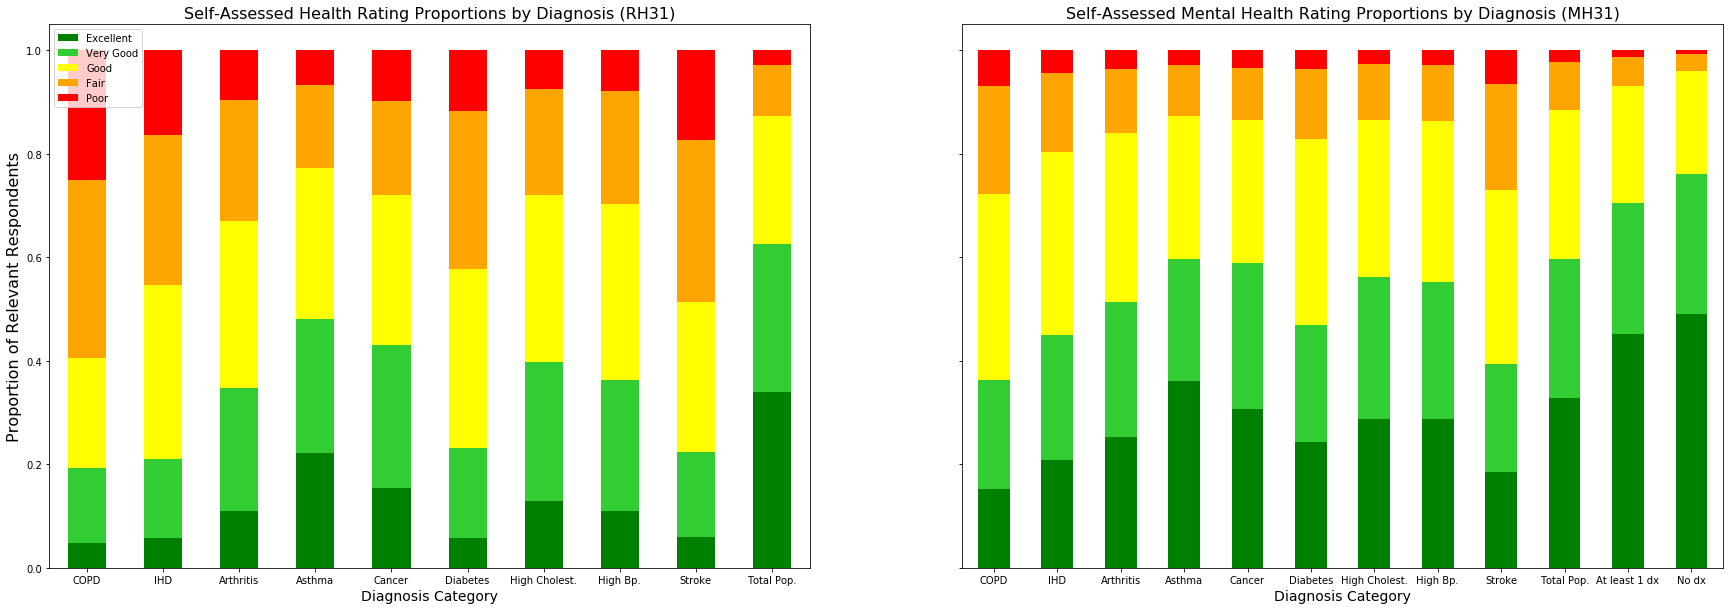

In [65]:
# Graph Health Percentages by DX for RH and MH
fig, axs = plt.subplots(1, 2, figsize=(30,10), sharey=True)

colors=['green','limegreen','yellow','orange','red']
xticklabels = ['COPD', 'IHD', 'Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'High Cholest.', 'High Bp.', 'Stroke', 'Total Pop.', 'At least 1 dx', 'No dx' ]

health_by_diag_norm_rh_df.transpose().plot.bar(stacked=True, colors=colors, rot=0, ax=axs[0])
axs[0].set_title('Self-Assessed Health Rating Proportions by Diagnosis (RH31)', fontsize=16) 
axs[0].set_ylabel('Proportion of Relevant Respondents', fontsize=16) 
axs[0].set_xlabel('Diagnosis Category', fontsize=14), axs[0].set_xticklabels(xticklabels)

health_by_diag_norm_mh_df.transpose().plot.bar(stacked=True, colors=colors, rot=0, ax=axs[1], legend=False)
axs[1].set_title('Self-Assessed Mental Health Rating Proportions by Diagnosis (MH31)', fontsize=16) 
axs[1].set_xlabel('Diagnosis Category', fontsize=14), axs[1].set_xticklabels(xticklabels)












In [54]:
df[df.dx_COPD=='Yes'].mh31.value_counts(normalize=True).sort_index()

Excellent    0.151844
Very Good    0.210412
Good         0.360087
Fair         0.208243
Poor         0.069414
Name: mh31, dtype: float64

AttributeError: 'module' object has no attribute 'set_ylabel'

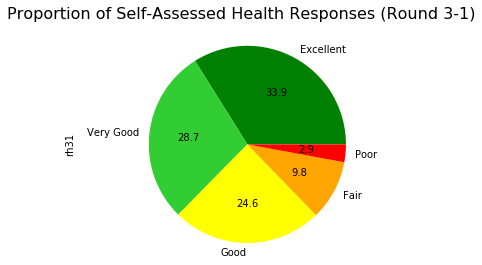

In [68]:
# Overall Distribution of self-assessed health responses

plt.suptitle('Proportion of Self-Assessed Health Responses (Round 3-1)', fontsize=16)

colors=['green','limegreen','yellow','orange','red']

df.rh31.value_counts().sort_index().plot.pie(legend=False, colors=colors, autopct='%.1f')
plt.axis('equal'), plt.set_ylabel('')


(Text(0.5,1,u'MH-31'), Text(0.5,0,u''))

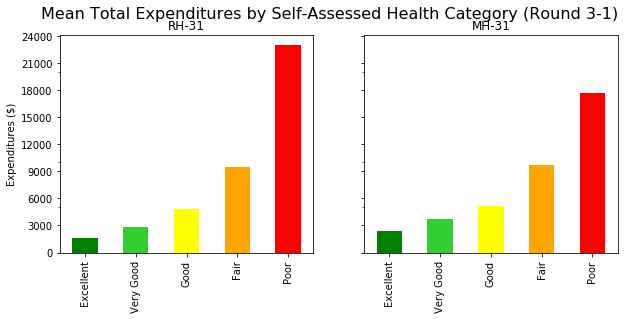

In [56]:
# Mean expenditures by self-assessed Health Category (Round 3-1)

fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey=True)

plt.suptitle('Mean Total Expenditures by Self-Assessed Health Category (Round 3-1)', fontsize=16)
axs[0].set_ylabel('Expenditures ($)')

colors=['green','limegreen','yellow','orange','red']

df.groupby('rh53')['tot_exp'].mean().plot(kind='bar', colors=colors, yticks=(range(0,27000,3000)), ax=axs[0])
axs[0].set_title('RH-31'), axs[0].set_xlabel('')
df.groupby('mh53')['tot_exp'].mean().plot(kind='bar', colors=colors, yticks=(range(0,27000,3000)), ax=axs[1])
axs[1].set_title('MH-31'), axs[1].set_xlabel('')

/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


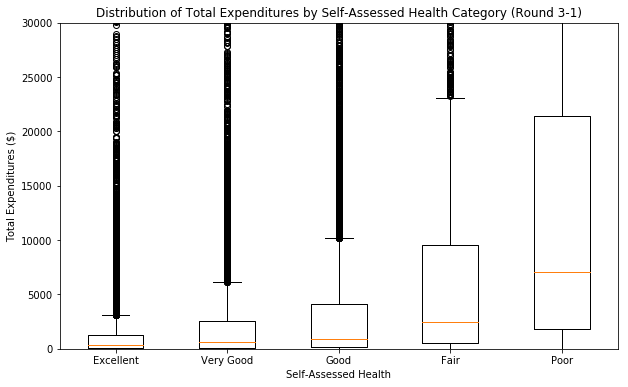

In [57]:
# Distribution of Total Expenditures by Self-Assessed Health Category
boxplot_data = [df[df.rh31=='Excellent']['tot_exp'], df[df.rh31=='Very Good']['tot_exp'],
                df[df.rh31=='Good']['tot_exp'], df[df.rh31=='Fair']['tot_exp'],
                df[df.rh31=='Poor']['tot_exp']]
fig, axs = plt.subplots(figsize=(10,6))
axs.set_title('Distribution of Total Expenditures by Self-Assessed Health Category (Round 3-1)')
axs.boxplot(boxplot_data)
axs.set_ylim(0,30000), axs.set_ylabel('Total Expenditures ($)')
axs.set_xticklabels(labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']), axs.set_xlabel('Self-Assessed Health')

plt.show()

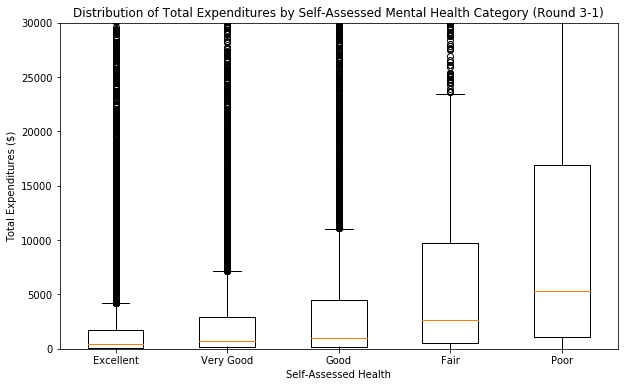

In [58]:
boxplot_data = [df[df.mh31=='Excellent']['tot_exp'], df[df.mh31=='Very Good']['tot_exp'],
                df[df.mh31=='Good']['tot_exp'], df[df.mh31=='Fair']['tot_exp'],
                df[df.mh31=='Poor']['tot_exp']]
fig, axs = plt.subplots(figsize=(10,6))
axs.set_title('Distribution of Total Expenditures by Self-Assessed Mental Health Category (Round 3-1)')
axs.boxplot(boxplot_data)
axs.set_ylim(0,30000), axs.set_ylabel('Total Expenditures ($)')
axs.set_xticklabels(labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']), axs.set_xlabel('Self-Assessed Health')

plt.show()